In [40]:
import os
import numpy as np
import pandas as pd
import json

In [77]:
hits_folder_path = '/Users/madelinefollosco/Documents/GitHub/wsd-data/wsd-hits'
no_hit_folder_path = '/Users/madelinefollosco/Documents/GitHub/wsd-data/wsd-nohit'
#hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'

#initialize dataframe
df = pd.DataFrame(columns=['Hit Type', 'Pitch Type', 'Pitch Speed'])

# categorize ground balls, line drives, power, pop ups
# exit velocity will tell if the ball was hard hit or not
"""
Ground ball: Lower than 10 degrees
Line drive: 10-25 degrees
Fly ball: 25-50 degrees
Pop up: Higher than 50 degrees
"""
nons = []
count = 0
# maybe - also if passed boundary 
def classify_hit_type(data):
    hit_type = 'none'
    #check null cases
    if ('summary_acts' in data and 'hit' in data['summary_acts'] and 'speed' in data['summary_acts']['hit'] and
    'events' in data and len(data['events']) != 0 and 'start' in data['events'][0]):
        if data['summary_acts']['pitch']['result'] == "HitIntoPlay":
            # pop up
            if(data['events'][0]['start']['angle'][1] >= 50 ):
                hit_type = 'Pop Up'
                
            # power hit or pop fly depending on exit velocity
            if((data['events'][0]['start']['angle'][1] > 25 and data['events'][0]['start']['angle'][1] < 50 )):
                if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                    hit_type = 'Power'
                else: 
                    hit_type = 'Fly Ball'
                    

            # line drives: hard hit vs lightly hit
            if((data['events'][0]['start']['angle'][1] >= 10 and data['events'][0]['start']['angle'][1] <= 25 )):
                if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                    hit_type = 'Hard Hit Line Drive'
                else: 
                    hit_type = 'Light Line Drive'
    
            # ground balls: hard hit vs lightly hit
            elif (data['events'][0]['start']['angle'][1] < 10 ):
                if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                    hit_type = 'Hard Hit Ground Ball'
                else: 
                    hit_type = 'Light Ground Ball'
    elif data['summary_acts']['pitch']['result'] == "Strike":
        hit_type = 'Strike'

    # else: 
    #     nons.append(data['summary_acts']['pitch']['result'])

    return hit_type


#read files
for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            row = {
                "Hit Type" : classify_hit_type(data),
                "Pitch Type" : data['summary_acts']['pitch']['type'],
                "Pitch Speed" : data['summary_acts']['pitch']['speed']['mph']
            }
            # you can remove this check if you want to add all data even if some of the fields is null
            if (row["Hit Type"] != 'none'
                and row["Pitch Type"] is not None and len(row["Pitch Type"]) > 0
                and row["Pitch Speed"] is not None):
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# hit_t = []
# pitch_t = []
# pitch_s = []
for filename in os.listdir(no_hit_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hit_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            row = {
                "Hit Type" : classify_hit_type(data),
                "Pitch Type" : data['summary_acts']['pitch']['type'],
                "Pitch Speed" : data['summary_acts']['pitch']['speed']['mph']
            }
            # you can remove this check if you want to add all data even if some of the fields is null
            if (row["Hit Type"] != 'none'
                and row["Pitch Type"] is not None and len(row["Pitch Type"]) > 0
                and row["Pitch Speed"] is not None):
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
                # hit_t.append(classify_hit_type(data))
                # pitch_t.append(data['summary_acts']['pitch']['type'])
                # pitch_s.append(data['summary_acts']['pitch']['speed']['mph'])
            
# for ind in df.index:
#     if(df['Hit Type'][ind] == 'Power' or df['Hit Type'][ind] == 'Fly Ball' or df['Hit Type'][ind] == 'Hard Hit Line Drive'):
#         df['P_Outcome'] = 'Bad'
#     else: df['P_Outcome'] = 'Good'

df["Good"] = ~(df["Hit Type"] == "Power") & ~(df["Hit Type"] == "Hard Hit Line Drive") & ~(df["Hit Type"] == "Fly Ball") & ~(df["Hit Type"] == "Hard Hit Ground Ball")

/var/folders/r_/40_87j712q798z4s35dc6kh00000gn/T/ipykernel_18004/1508827536.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)


In [78]:
display(df)
df.to_csv('Hit_vs_Pitch analysis.csv')

,Hit Type,Pitch Type,Pitch Speed,Good
0,Strike,Slider,84.0,True
1,Strike,Curveball,79.0,True
2,Strike,Curveball,78.0,True
3,Light Ground Ball,Sinker,94.0,True
4,Strike,Curveball,79.0,True
...,...,...,...,...
148,Strike,Sinker,90.0,True
149,Strike,FourSeamFastball,91.0,True
150,Strike,Changeup,84.0,True
151,Strike,Curveball,77.0,True


In [35]:
# Store data in matrix
# pitch_matrix = np.zeros([len(hit_t), len(pitch_t)])
# for i in range(len(pitch_type_data)):
#     pitch_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_result_types.index(pitch_result_data[i])] += 1
# print(pitch_matrix)

In [37]:
# df.corr()

In [63]:
# graphing final distance of ball
import matplotlib.pyplot as plt

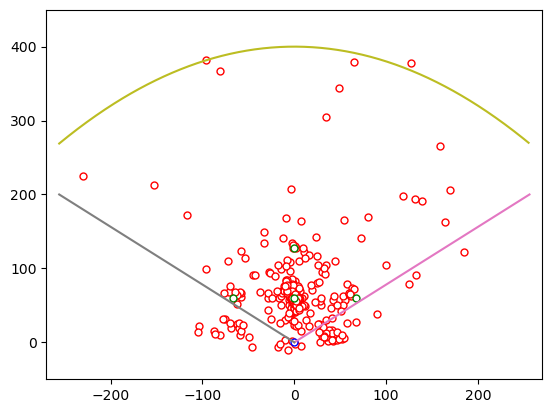

599


In [165]:
x = []
y = []
count = 0
for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            count += 1
            data = json.load(json_file)
            x.append(data["samples_ball"][-1]["pos"][0])
            y.append(data["samples_ball"][-1]["pos"][1])
plt.plot(x, y, linewidth = 0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="white")
# home plate
plt.plot(0,0, linewidth = 0, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="white")
# pitchers mound
plt.plot(0,60, linewidth = 0, marker="o", markersize=5, markeredgecolor="green", markerfacecolor="white")
# 1st base
plt.plot(67,60, linewidth = 0, marker="o", markersize=5, markeredgecolor="green", markerfacecolor="white")
# 2nd base
plt.plot(0,127, linewidth = 0, marker="o", markersize=5, markeredgecolor="green", markerfacecolor="white")
# 3rd base
plt.plot(-67,60, linewidth = 0, marker="o", markersize=5, markeredgecolor="green", markerfacecolor="white")

# 1st base foul line
d = [0,256]
e = [0,200]
plt.plot(d,e)
#3rd base foul line
f = [0,-256]
g = [0,200]
plt.plot(f,g)
# outer limits of the field
'''
Set the values in the variable x
The function arange helps to generate an array with the 
following parameters arange(start,end,increment)
'''
a = np.arange(-256,256,1)
'''
Now set the formula in the variable y
'''
b = 1/500*(-a**2)+400
'''
Then add the pair (x,y) to the plot
'''
plt.xlim(-270,270)
plt.ylim(-50,450)
plt.plot(a,b)

plt.show()
print(count)